In [1]:
#loading python libraries require to process dataset and then train with different machine learning algorithms
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from flask import Flask, render_template, request, redirect, url_for, session
import seaborn as sns

In [2]:
#reading and displaying dataset values
dataset = pd.read_csv("Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
labels = np.unique(dataset['Churn'])
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


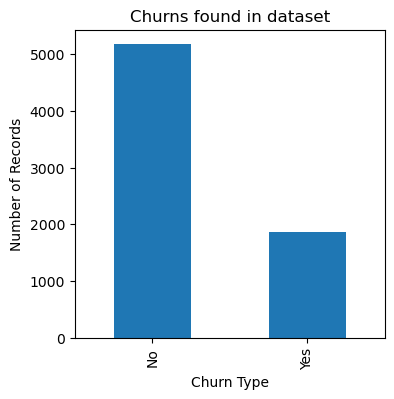

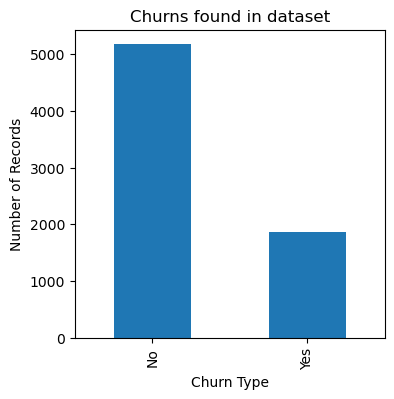

In [3]:
#finding & plotting different class labels graph
plt.rcParams["figure.figsize"]= [4,4]
plt.rcParams["figure.figsize"]= [4,4]
attack = dataset.groupby('Churn').size()
attack.plot(kind="bar")
plt.xlabel('Churn Type')
plt.ylabel('Number of Records')
plt.title('Churns found in dataset')
plt.show()

In [4]:
#dataset preprocessing as dataset contains lots of non-numeric values but ML algorithms accept pnly numeric dataset
#so by applying label encoding class we can convert non-numeric data to numeric
dataset.fillna(0, inplace = True)
label_encoder = []
columns = dataset.columns
types = dataset.dtypes.values
for i in range(len(types)):
    name = types[i]
    if name == 'object': #finding column with object type
        le = LabelEncoder()
        dataset[columns[i]] = pd.Series(le.fit_transform(dataset[columns[i]].astype(str)))#encode all str columns to numeric 
        label_encoder.append(le)
dataset        

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


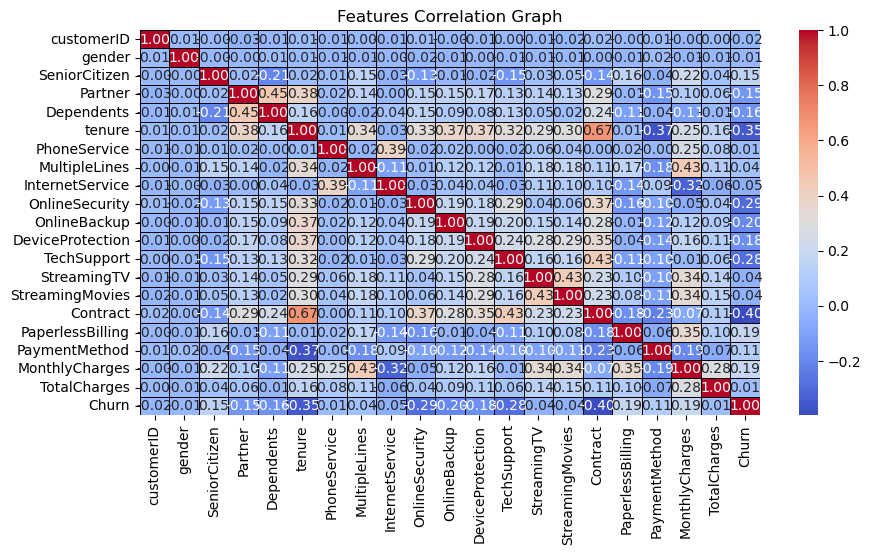

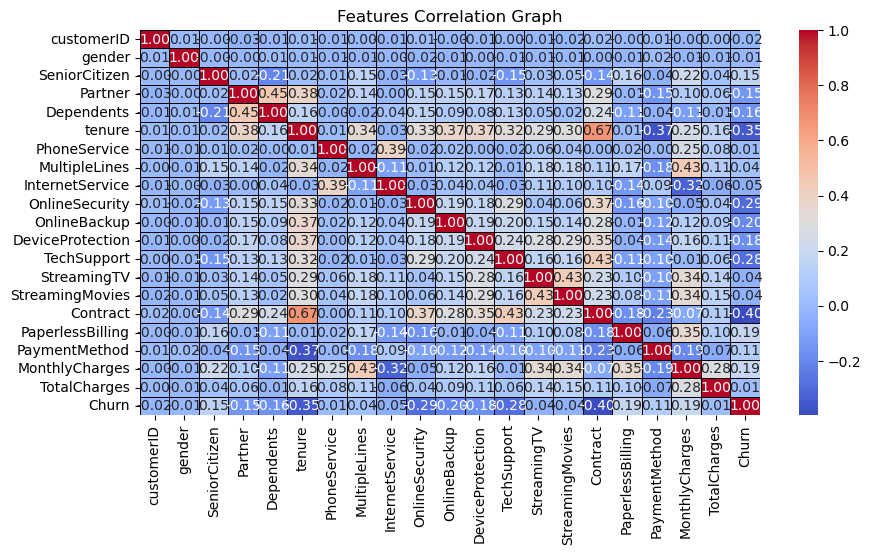

In [5]:
#dataset features correlation graph
plt.rcParams["figure.figsize"]= [10,5]
sns.heatmap(dataset.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',cmap="coolwarm")
plt.rcParams["figure.figsize"]= [10,5]
plt.title("Features Correlation Graph")
plt.show()

In [6]:
#dataset normalization and shuffling
dataset = dataset.values
X = dataset[:,1:dataset.shape[1]-1] #extracting training features & Target variable
Y = dataset[:,dataset.shape[1]-1]
Y = Y.astype(int)
indices = np.arange(X.shape[0])
np.random.shuffle(indices) #shffling dataset
X = X[indices]
Y = Y[indices]
scaler = StandardScaler()
X = scaler.fit_transform(X) #normalizing values
#splitting dataset into train and test where 80% dataset will be using for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #split dataset into train and tesrt
print("Dataset train & test split as 80% dataset for training and 20% for testing")
print("(80%) dataset records used for training : "+str(X_train.shape[0])) #print training and test size
print("(20%) dataset records used for testing  : "+str(X_test.shape[0]))
X_train, X_test1, y_train, y_test1 = train_test_split(X, Y, test_size=0.1) 

Dataset train & test split as 80% dataset for training and 20% for testing
(80%) dataset records used for training : 5634
(20%) dataset records used for testing  : 1409
Dataset train & test split as 80% dataset for training and 20% for testing
(80%) dataset records used for training : 5634
(20%) dataset records used for testing  : 1409


In [7]:
auc = []
accuracy = []

In [8]:
#function to calculate auc
def calculateMetrics(algorithm, testY, predict):
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    fpr, tpr, _ = roc_curve(testY, predict, pos_label=1)
    auc_value = metrics.auc(fpr, tpr) * 100
    auc.append(auc_value)
    print(algorithm+" Accuracy  : "+str(a))
    print(algorithm+" AUC       : "+str(auc_value))
    
    random_probs = [0 for i in range(len(testY))]
    p_fpr, p_tpr, _ = roc_curve(testY, random_probs, pos_label=1)
    plt.plot(p_tpr, p_fpr, linestyle='--', color='orange',label="True classes")
    ns_fpr, ns_tpr, _ = roc_curve(testY, predict, pos_label=1)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Predicted Classes')
    plt.title(algorithm+" AUC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.show()
    

Logistic Regression Accuracy  : 79.20511000709723
Logistic Regression AUC       : 70.42517146917675
Logistic Regression Accuracy  : 79.20511000709723
Logistic Regression AUC       : 70.42517146917675


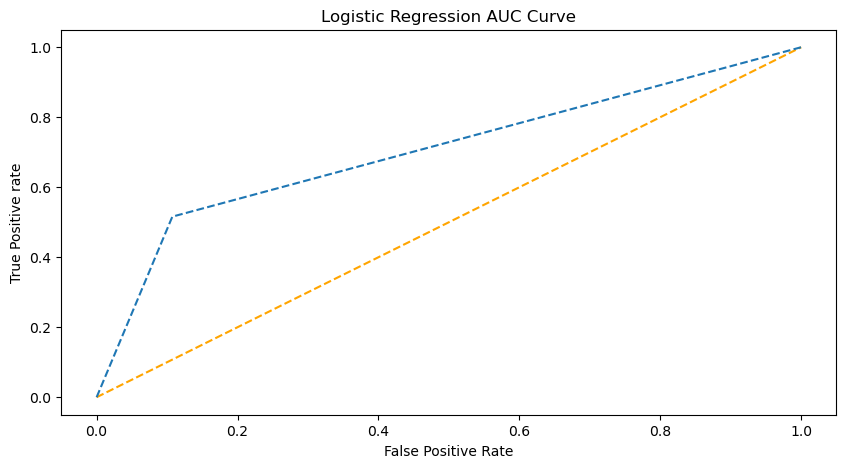

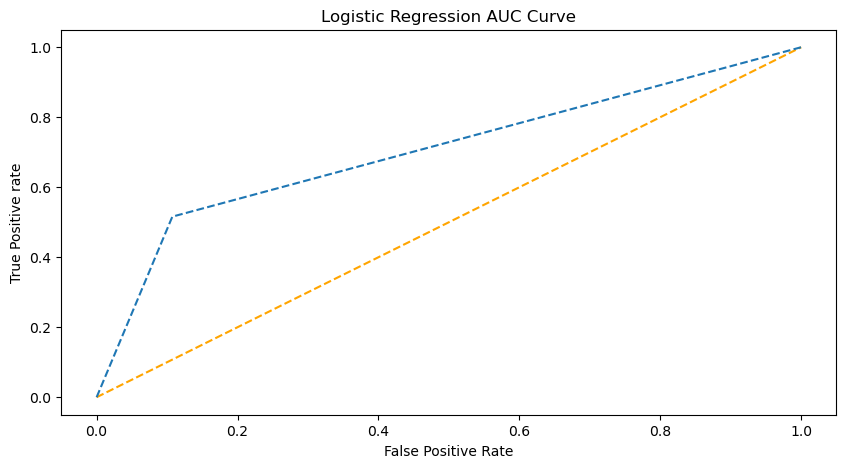

In [9]:
#training Logistic Regression with train data and perform prediction on test data
lr_cls = LogisticRegression()
lr_cls.fit(X_train, y_train)
predict = lr_cls.predict(X_test)
calculateMetrics("Logistic Regression", y_test, predict)

SVM Accuracy  : 80.55358410220013
SVM AUC       : 70.41448682828366
SVM Accuracy  : 80.55358410220013
SVM AUC       : 70.41448682828366


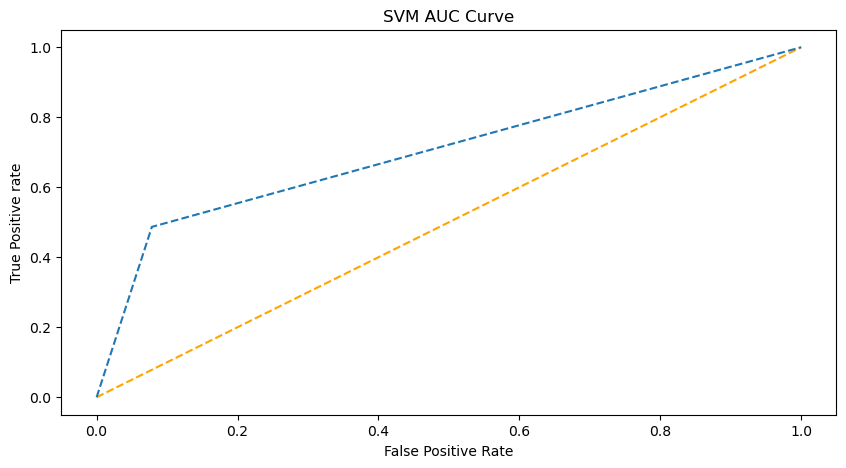

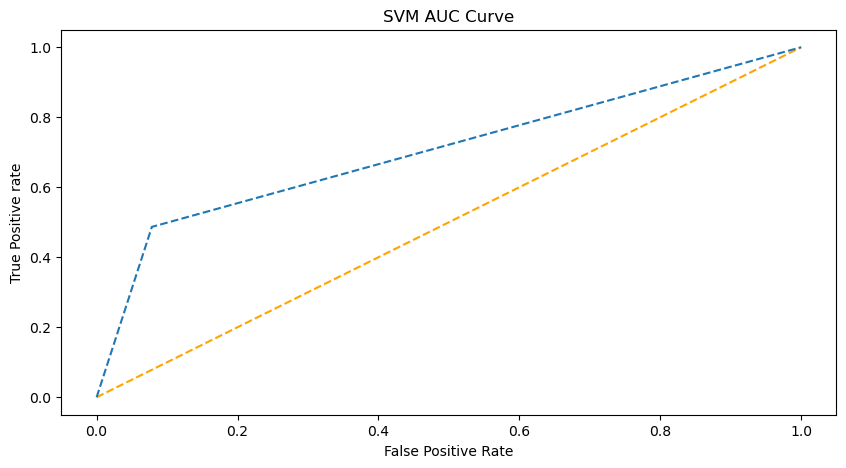

In [10]:
#training SVM with train data and perform prediction on test data
svm_cls = svm.SVC()
svm_cls.fit(X_train, y_train)
predict = svm_cls.predict(X_test)
calculateMetrics("SVM", y_test, predict)

Random Forest Accuracy  : 96.30943931866572
Random Forest AUC       : 94.69205062717555
Random Forest Accuracy  : 96.30943931866572
Random Forest AUC       : 94.69205062717555


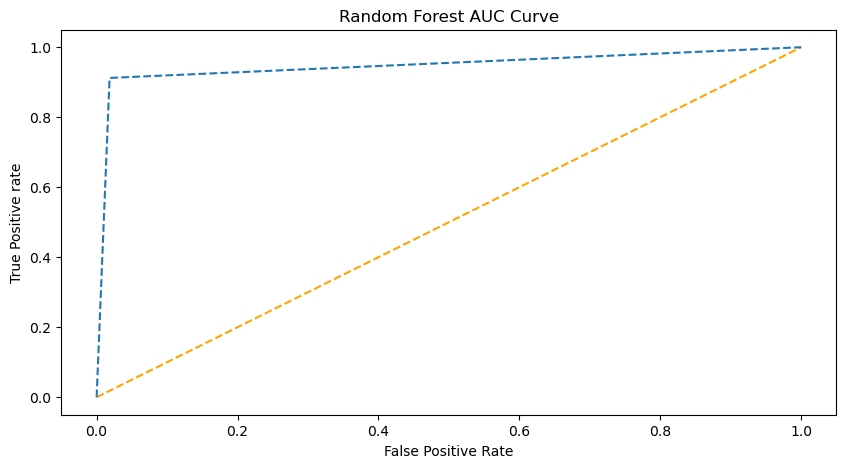

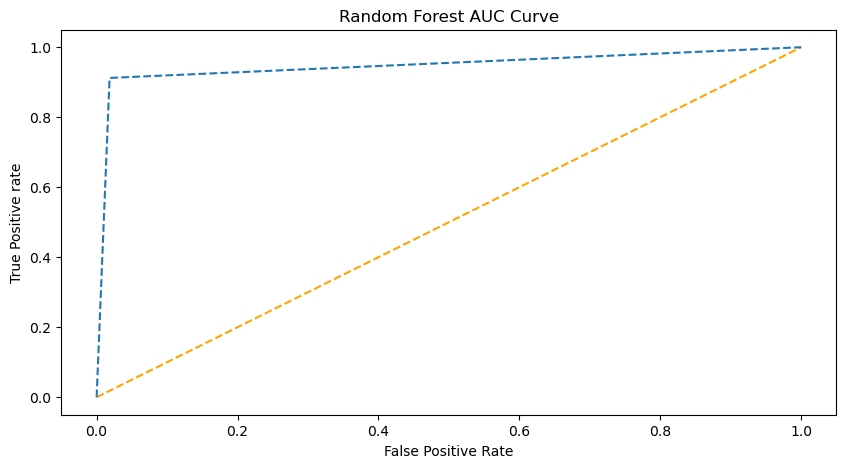

In [11]:
#training Random Forest with train data and perform prediction on test data
rf_cls = RandomForestClassifier(n_estimators=10)
rf_cls.fit(X_train, y_train)
predict = rf_cls.predict(X_test)
calculateMetrics("Random Forest", y_test, predict)

Gradient Boosting Accuracy  : 81.40525195173882
Gradient Boosting AUC       : 71.92565549628226
Gradient Boosting Accuracy  : 81.40525195173882
Gradient Boosting AUC       : 71.92565549628226


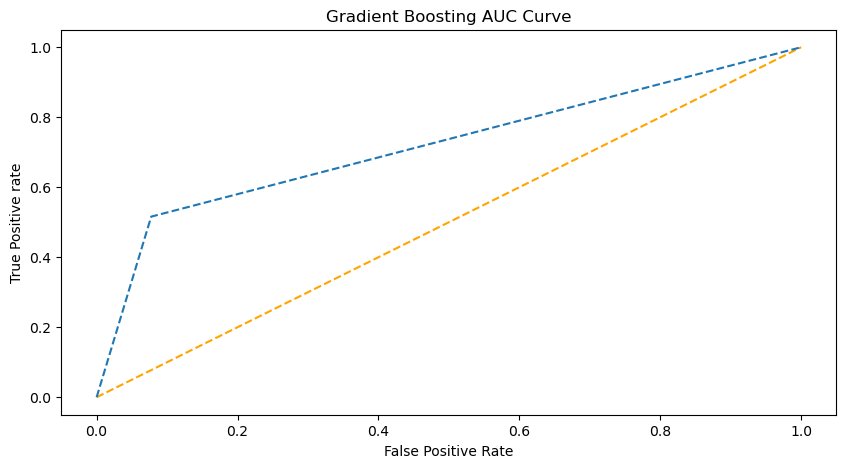

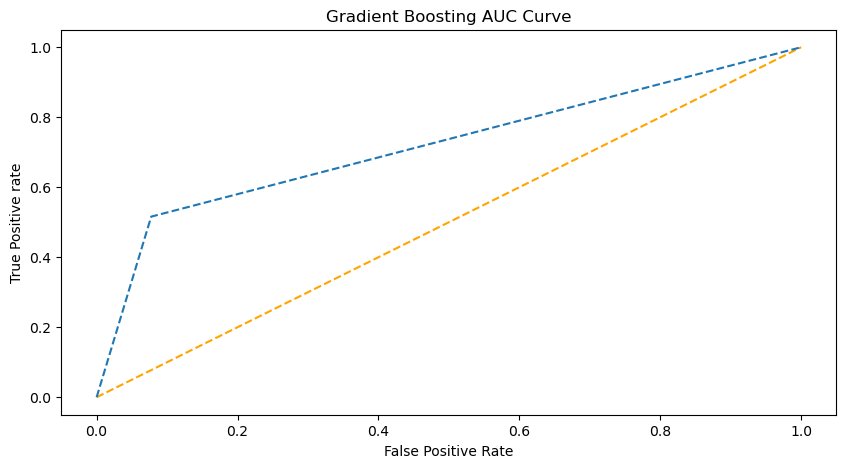

In [12]:
#training Gradient Boosting with train data and perform prediction on test data
gb_cls = GradientBoostingClassifier(learning_rate=0.05, max_features=18)
gb_cls.fit(X, Y)
predict = gb_cls.predict(X_test)
calculateMetrics("Gradient Boosting", y_test, predict)

In [13]:
columns = ["Algorithm Name","Accuracy","AUC"]
values = []
algorithm_names = ["Logistic Regression", "SVM", "Random Forest", "Gradient Boosting"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],accuracy[i],auc[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Accuracy,AUC
0,Logistic Regression,79.205110,70.425171
1,SVM,80.553584,70.414487
2,Random Forest,96.309439,94.692051
3,Gradient Boosting,81.405252,71.925655


,Algorithm Name,Accuracy,AUC
0,Logistic Regression,79.205110,70.425171
1,SVM,80.553584,70.414487
2,Random Forest,96.309439,94.692051
3,Gradient Boosting,81.405252,71.925655


In [ ]:
from flask import Flask, render_template, request, redirect, url_for, session
from werkzeug.utils import secure_filename

app = Flask(__name__)
app.secret_key = 'churn'

@app.route('/index', methods=['GET', 'POST'])
def index():
    return render_template('index.html', msg='')

@app.route('/ChurnPrediction', methods=['GET', 'POST'])
def ChurnPrediction():
    return render_template('ChurnPrediction.html', msg='')

@app.route('/ChurnPredictionAction', methods=['GET', 'POST'])
def ChurnPredictionAction():
    if request.method == 'POST':
        column_details = 'customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges'
        data = request.form['t1']
        arr = data.split(",")
        col_arr = column_details.split(",")
        values = []
        for i in range(len(arr)):
            if i == 2:
                values.append(int(arr[i].strip()))
            elif i == 5:
                values.append(int(arr[i].strip()))
            elif i == 18:
                values.append(float(arr[i]))                
            else:
                values.append(arr[i])
        temp = []
        temp.append(values)
        temp = np.asarray(temp)
        testData = pd.DataFrame(temp, columns = col_arr)  
        testData['SeniorCitizen'] = testData['SeniorCitizen'].astype(int)
        testData['tenure'] = testData['tenure'].astype(int)
        testData['MonthlyCharges'] = testData['MonthlyCharges'].astype(float)
        index = 0
        columns = testData.columns
        types = testData.dtypes.values
        for i in range(len(types)):
            name = types[i]
            if name == 'object': #finding column with object type
                testData[columns[i]] = pd.Series(label_encoder[index].transform(testData[columns[i]].astype(str)))#encode all str columns to numeric
                index = index + 1
        testData = testData.values        
        test = testData[:,1:testData.shape[1]]
        test = scaler.transform(test)
        predict = int(rf_cls.predict(test))
        output = "Test Data "+str(testData[0])+"===> Predicted As "+labels[predict]
        return render_template('ChurnPrediction.html', msg=output)
if __name__ == '__main__':
    app.run()         

 * Serving Flask app "__main__" (lazy loading)
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
 * Environment: production
   Use a production WSGI server instead.
   Use a production WSGI server instead.
 * Debug mode: off
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Feb/2023 16:18:29] "GET / HTTP/1.1127.0.0.1 - - [20/Feb/2023 16:18:29] "" 404 -
GET / HTTP/1.1" 404 -
127.0.0.1 - - [20/Feb/2023 16:18:29] "GET /favicon.ico HTTP/1.1127.0.0.1 - - [20/Feb/2023 16:18:29] "" 404 -
GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [20/Feb/2023 16:19:36] "GET / HTTP/1.1127.0.0.1 - - [20/Feb/2023 16:19:36] "" 404 -
GET / HTTP/1.1" 404 -
127.0.0.1 - - [20/Feb/2023 16:20:08] "127.0.0.1 - - [20/Feb/2023 16:20:08] "GET / HTTP/1.1" 404 -
GET / HTTP/1.1" 404 -
127.0.0.1 - - [20/Feb/2023 16:20:27] "GET / HTTP/1.1127.0.0.1 - - [20/Feb/2023 16:20:27] "" 404 -
GET / HTTP/1.1" 404 -
127.0.0.1 - - [20/Feb/2023 16:20:31] "GET / HTTP/1.1127.0.0.1 - - [20/Feb/2023 16:20:31] "" 404 -
GET / HTTP/1.1" 404 -
127.0.0.1 - - [20/Feb/2023 16:21:48] "GET / HTTP/1.1127.0.0.1 - - [20/Feb/2023 16:21:48] "" 404 -
GET / HTTP/1.1" 404 -
127.0.0.1 - - [20/